In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


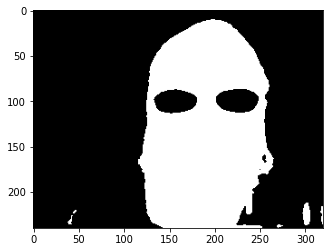

In [73]:
import cv2
import matplotlib.pyplot as plt

img_path = 'drive/My Drive/BIOMETRIA/face_detection_examples/person2-3.jpg'
image = cv2.imread(img_path, 0)

img_blur = cv2.GaussianBlur(image, (5, 5), 0)

mean, std = cv2.meanStdDev(img_blur)

retval, thr = cv2.threshold(img_blur, mean, 255, cv2.THRESH_BINARY)
plt.imshow(thr, cmap='gray')
plt.show()

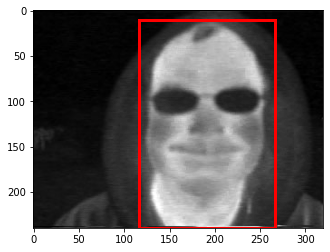

In [74]:
from matplotlib.patches import Rectangle
import numpy as np
from google.colab.patches import cv2_imshow

contours, hier = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
x_good = 0
y_good = 0
w_good = 0
h_good = 0
for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    if w > w_good and h > h_good:
      x_good = x
      y_good = y
      w_good = w
      h_good = h

plt.imshow(image, cmap='gray')

ax = plt.gca()

rect = Rectangle((x_good, y_good), w_good, h_good, linewidth=3, edgecolor='r', facecolor='none')

ax.add_patch(rect)

plt.show()

